In [1]:
# !pip install transformers
# !pip install tqdm pandas


In [2]:
from transformers import AutoTokenizer
import pandas as pd
import numpy as np
import tqdm
from transformers import pipeline



 
### Token Repetition Rate Metric Explanation

The **Token Repetition Rate** is designed to measure the proportion of repeated tokens in a given text. It is calculated as:

\[
\text{Repetition Rate} = 1 - \frac{\text{Number of Unique Tokens}}{\text{Total Number of Tokens}}
\]


The **Token Repetition Rate** helps identify redundant or low-quality data in a dataset:
- **High repetition rates** (closer to `1`) often suggest redundant or repetitive text.
- **Low repetition rates** (closer to `0`) suggest diverse and unique content.

In [3]:
# Metric 2: Token Repetition Rate
def lexical_diversity(text, tokenizer):
    """
    Compute token repetition rate as the proportion of repeated tokens
    using a multilingual model tokenizer.
    """
    tokens = tokenizer.tokenize(text)
    unique_tokens = set(tokens)
    return (len(unique_tokens) / len(tokens)) if tokens else 0


"""

2-gram, 3-gram, 4-gram
My name is is dipika


my name is dipika, your name is .., his name is...

"""

'\n\n2-gram, 3-gram, 4-gram\nMy name is is dipika\n\n\nmy name is dipika, your name is .., his name is...\n\n'

In [4]:
# Load the dataset
file_path = "data/sampled_aya_all_subsets_15k.parquet"
df = pd.read_parquet(file_path)


In [5]:
df

,id,inputs,targets,dataset_name,sub_dataset_name,task_type,template_id,language,split,script,subset_name,aya_partition
0,303,Quæ a l’é a traduçion italiaña de sto testo?\n...,A traduçion in italian do testo a l’é:\nSalari...,Lijnews-instruct,lijnews-instruct-lij-ita,translation,18,lij,train,Latn,templated_ligurian_news_train_sample,templated
1,212,Traduci questo testo in genovese:\nL'Europa ap...,La traduzione in genovese del testo è:\nL'Eurö...,Lijnews-instruct,lijnews-instruct-ita-lij,translation,6,ita,train,Latn,templated_ligurian_news_train_sample,templated
2,170,Qual è la traduzione genovese di questo testo?...,La traduzione in genovese del testo è:\nAttent...,Lijnews-instruct,lijnews-instruct-ita-lij,translation,8,ita,train,Latn,templated_ligurian_news_train_sample,templated
3,290,Traduxi in lengua italiaña:\nPapê fäsci in scî...,A traduçion in italian do testo a l’é:\nFalsi ...,Lijnews-instruct,lijnews-instruct-lij-ita,translation,14,lij,train,Latn,templated_ligurian_news_train_sample,templated
4,331,Quæ a l’é a traduçion italiaña de sto testo?\n...,A traduçion in italian do testo a l’é:\nRussia...,Lijnews-instruct,lijnews-instruct-lij-ita,translation,18,lij,train,Latn,templated_ligurian_news_train_sample,templated
...,...,...,...,...,...,...,...,...,...,...,...,...
15071,151002,Ba mhaith liom tuirse a thabhairt do ghaolta a...,Ba mhaith liom a mholadh dóibh pictiúr greannm...,Aya-Dataset,-,-,0,gle,train,Latn,aya_dataset_train_sample,aya
15072,158437,Ερώτηση: Τι είναι η απάντηση στην αξία της ανά...,Απάντηση: Η ανάγνωση βιβλίων έχει αξία στην εκ...,Aya-Dataset,-,-,0,ita,train,Latn,aya_dataset_train_sample,aya
15073,65556,Haddii aan haysto 5 moos oo aan 2 xabo siiyo q...,Waxaad haysataa 3 moos.,Aya-Dataset,-,-,0,som,train,Latn,aya_dataset_train_sample,aya
15074,122083,Quelle est la capitale du Canada?,La capitale du Canada est Ottawa dans la provi...,Aya-Dataset,-,-,0,fra,train,Latn,aya_dataset_train_sample,aya


In [6]:
df["inputs"][0],df["targets"][0]

('Quæ a l’é a traduçion italiaña de sto testo?\nSaläio minimo, o Governo o l\'arve ma se ne parlià à settembre\nO Governo o l\'arve a-a propòsta de un saläio minimo fissou pe lezze, ma a discuscion a se faià à settembre. A maggioransa a l\'aiva deçiso de no votâ in commiscion l\'emendamento pe scassâ o testo presentou da l\'oppoxiçion, dapeu a l\'à stabilio de piggiâse doî meixi de tempo pe çercâ d\'arrivâ à unna verscion unitäia. A propòsta da minoransa a prevedde unna paga minima de 9 euro à l\'oa da-i 15 de novembre do 2024. Quella de Forza Italia a veu solo che estende i contræti collettivi à chi l\'é descoverto, con l\'applicaçion de quello "ciù in veuga" pe-o settô. I scindicati no son tutti da mæxima: a Cisl, prexempio, a temme che l\'iniçiativa in Parlamento a pòsse levâ da forsa a-a contrattaçion.',
 'A traduçion in italian do testo a l’é:\nSalario minimo, il Governo apre ma se ne parlerà a settembre\nIl Governo apre alla proposta di un salario minimo fissato per legge, ma la 

In [7]:
# Load a multilingual tokenizer
tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-base")

# Apply the function to both 'inputs' and 'targets' columns
df['input_lexical_diversity'] = df['inputs'].apply(lambda text: lexical_diversity(text, tokenizer))
df['target_lexical_diversity'] = df['targets'].apply(lambda text: lexical_diversity(text, tokenizer))


Token indices sequence length is longer than the specified maximum sequence length for this model (577 > 512). Running this sequence through the model will result in indexing errors


In [8]:
df

,id,inputs,targets,dataset_name,sub_dataset_name,task_type,template_id,language,split,script,subset_name,aya_partition,input_lexical_diversity,target_lexical_diversity
0,303,Quæ a l’é a traduçion italiaña de sto testo?\n...,A traduçion in italian do testo a l’é:\nSalari...,Lijnews-instruct,lijnews-instruct-lij-ita,translation,18,lij,train,Latn,templated_ligurian_news_train_sample,templated,0.590747,0.717277
1,212,Traduci questo testo in genovese:\nL'Europa ap...,La traduzione in genovese del testo è:\nL'Eurö...,Lijnews-instruct,lijnews-instruct-ita-lij,translation,6,ita,train,Latn,templated_ligurian_news_train_sample,templated,0.648649,0.548287
2,170,Qual è la traduzione genovese di questo testo?...,La traduzione in genovese del testo è:\nAttent...,Lijnews-instruct,lijnews-instruct-ita-lij,translation,8,ita,train,Latn,templated_ligurian_news_train_sample,templated,0.711934,0.554252
3,290,Traduxi in lengua italiaña:\nPapê fäsci in scî...,A traduçion in italian do testo a l’é:\nFalsi ...,Lijnews-instruct,lijnews-instruct-lij-ita,translation,14,lij,train,Latn,templated_ligurian_news_train_sample,templated,0.530055,0.671756
4,331,Quæ a l’é a traduçion italiaña de sto testo?\n...,A traduçion in italian do testo a l’é:\nRussia...,Lijnews-instruct,lijnews-instruct-lij-ita,translation,18,lij,train,Latn,templated_ligurian_news_train_sample,templated,0.497238,0.645299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15071,151002,Ba mhaith liom tuirse a thabhairt do ghaolta a...,Ba mhaith liom a mholadh dóibh pictiúr greannm...,Aya-Dataset,-,-,0,gle,train,Latn,aya_dataset_train_sample,aya,0.925926,0.777778
15072,158437,Ερώτηση: Τι είναι η απάντηση στην αξία της ανά...,Απάντηση: Η ανάγνωση βιβλίων έχει αξία στην εκ...,Aya-Dataset,-,-,0,ita,train,Latn,aya_dataset_train_sample,aya,1.000000,0.883721
15073,65556,Haddii aan haysto 5 moos oo aan 2 xabo siiyo q...,Waxaad haysataa 3 moos.,Aya-Dataset,-,-,0,som,train,Latn,aya_dataset_train_sample,aya,0.892857,1.000000
15074,122083,Quelle est la capitale du Canada?,La capitale du Canada est Ottawa dans la provi...,Aya-Dataset,-,-,0,fra,train,Latn,aya_dataset_train_sample,aya,1.000000,0.579545


In [9]:
import pandas as pd

# Define percentiles to calculate
percentiles = [0.9, 0.95, 0.99]

# Calculate descriptive statistics
partition_descriptions = df.groupby("aya_partition")[["target_lexical_diversity"]].describe()

# Calculate additional percentiles for each partition and metric
additional_percentiles = (
    df.groupby("aya_partition")[["target_lexical_diversity"]]
    .quantile(percentiles)
    .reset_index()
    .rename(columns={"level_1": "percentile"})
)

# Reshape the additional percentiles for easier interpretation
percentile_table = additional_percentiles.pivot(
    index="aya_partition", columns="percentile", values=["target_lexical_diversity"]
)

# Combine descriptive statistics and percentiles into one table
stats_table = pd.concat(
    [partition_descriptions, percentile_table],
    axis=1,
)
stats_table


target_lexical_diversity                                \
                                 count      mean       std       min   
aya_partition                                                          
aya                             5000.0  0.793039  0.220618  0.022820   
templated                       5060.0  0.825826  0.199170  0.023169   
translated                      5016.0  0.833196  0.188492  0.007264   

                                                            
                    25%       50%  75%  max  0.9 0.95 0.99  
aya_partition                                               
aya            0.661017  0.857143  1.0  1.0  1.0  1.0  1.0  
templated      0.718750  0.895678  1.0  1.0  1.0  1.0  1.0  
translated     0.721311  0.881356  1.0  1.0  1.0  1.0  1.0

In [91]:
import pandas as pd

# Define percentiles to calculate
percentiles = [0.9, 0.95, 0.99]

# Calculate descriptive statistics
partition_descriptions = df.groupby("aya_partition")[["input_token_repetition_rate"]].describe()

# Calculate additional percentiles for each partition and metric
additional_percentiles = (
    df.groupby("aya_partition")[["input_lexical_diversity"]]
    .quantile(percentiles)
    .reset_index()
    .rename(columns={"level_1": "percentile"})
)

# Reshape the additional percentiles for easier interpretation
percentile_table = additional_percentiles.pivot(
    index="aya_partition", columns="percentile", values=["input_token_repetition_rate"]
)

# Combine descriptive statistics and percentiles into one table
stats_table = pd.concat(
    [partition_descriptions, percentile_table],
    axis=1,
)
stats_table


input_token_repetition_rate                                     \
                                    count      mean       std  min       25%   
aya_partition                                                                  
aya                                5000.0  0.099260  0.138344  0.0  0.000000   
templated                          5060.0  0.219170  0.199276  0.0  0.058824   
translated                         5016.0  0.257774  0.209358  0.0  0.081633   

                                                                           
                    50%       75%       max       0.9      0.95      0.99  
aya_partition                                                              
aya            0.041667  0.152868  0.725756  0.315789  0.403367  0.561411  
templated      0.144928  0.376372  0.931126  0.510836  0.575909  0.768257  
translated     0.209677  0.413043  0.994604  0.541158  0.626570  0.851988

/tmp/ipykernel_90346/2661814173.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_90346/2661814173.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


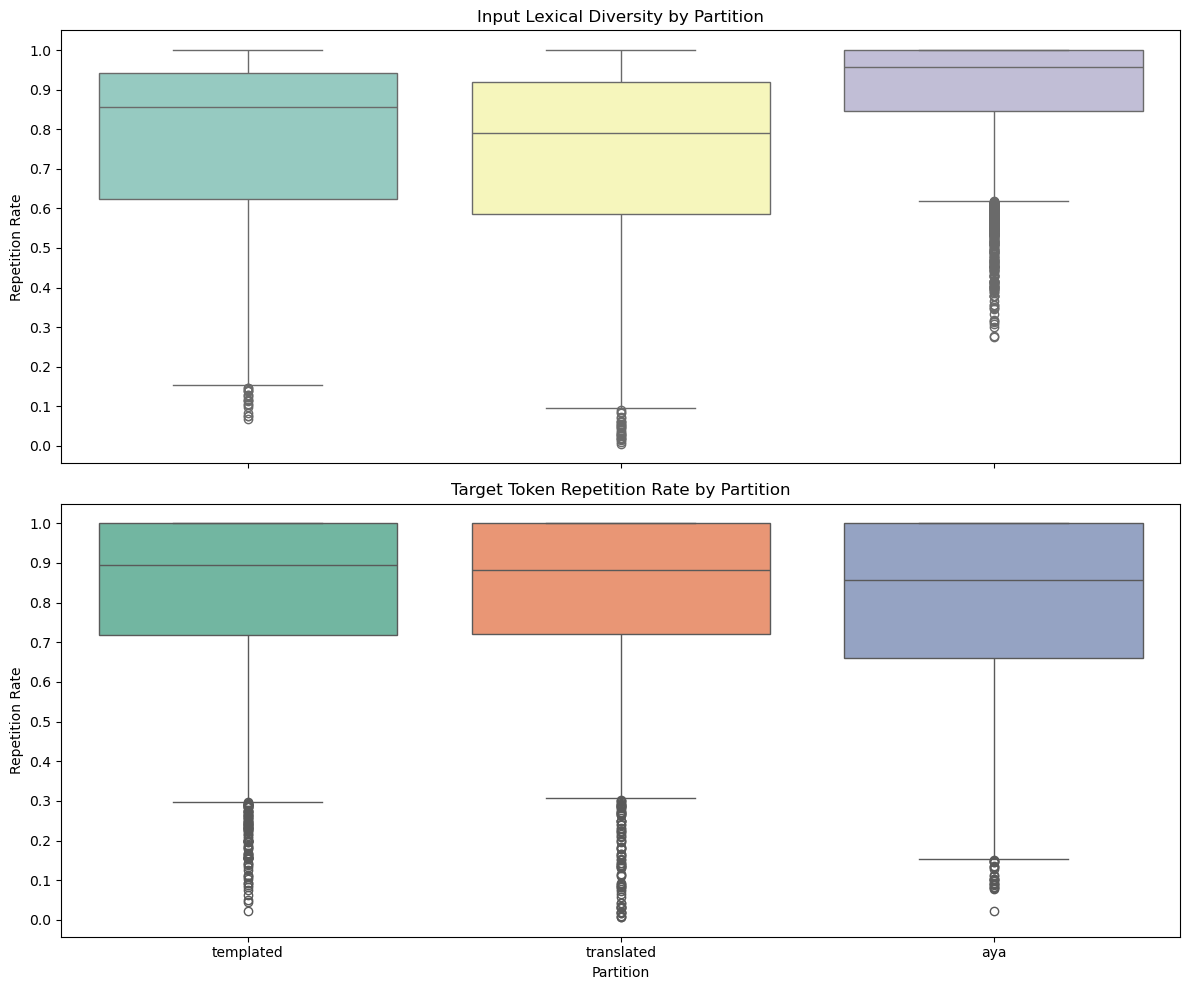

Boxplot saved as: lexical_diversity_boxplots.png


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots for boxplots with more granular y-axis ticks
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot input_token_repetition_rate boxplot
sns.boxplot(
    data=df,
    x="aya_partition",
    y="input_lexical_diversity",
    palette="Set3",
    ax=axs[0]
)
axs[0].set_title("Input Lexical Diversity by Partition")
axs[0].set_ylabel("Repetition Rate")
axs[0].set_yticks([i * 0.1 for i in range(11)])  # Set y-axis ticks

# Plot target_token_repetition_rate boxplot
sns.boxplot(
    data=df,
    x="aya_partition",
    y="target_lexical_diversity",
    palette="Set2",
    ax=axs[1]
)
axs[1].set_title("Target Token Repetition Rate by Partition")
axs[1].set_ylabel("Repetition Rate")
axs[1].set_xlabel("Partition")
axs[1].set_yticks([i * 0.1 for i in range(11)])  # Set y-axis ticks

# Adjust layout and save the plot
plt.tight_layout()
output_boxplot_path = "lexical_diversity_boxplots.png"
plt.savefig(output_boxplot_path, format="png", dpi=300)
plt.show()

print(f"Boxplot saved as: {output_boxplot_path}")


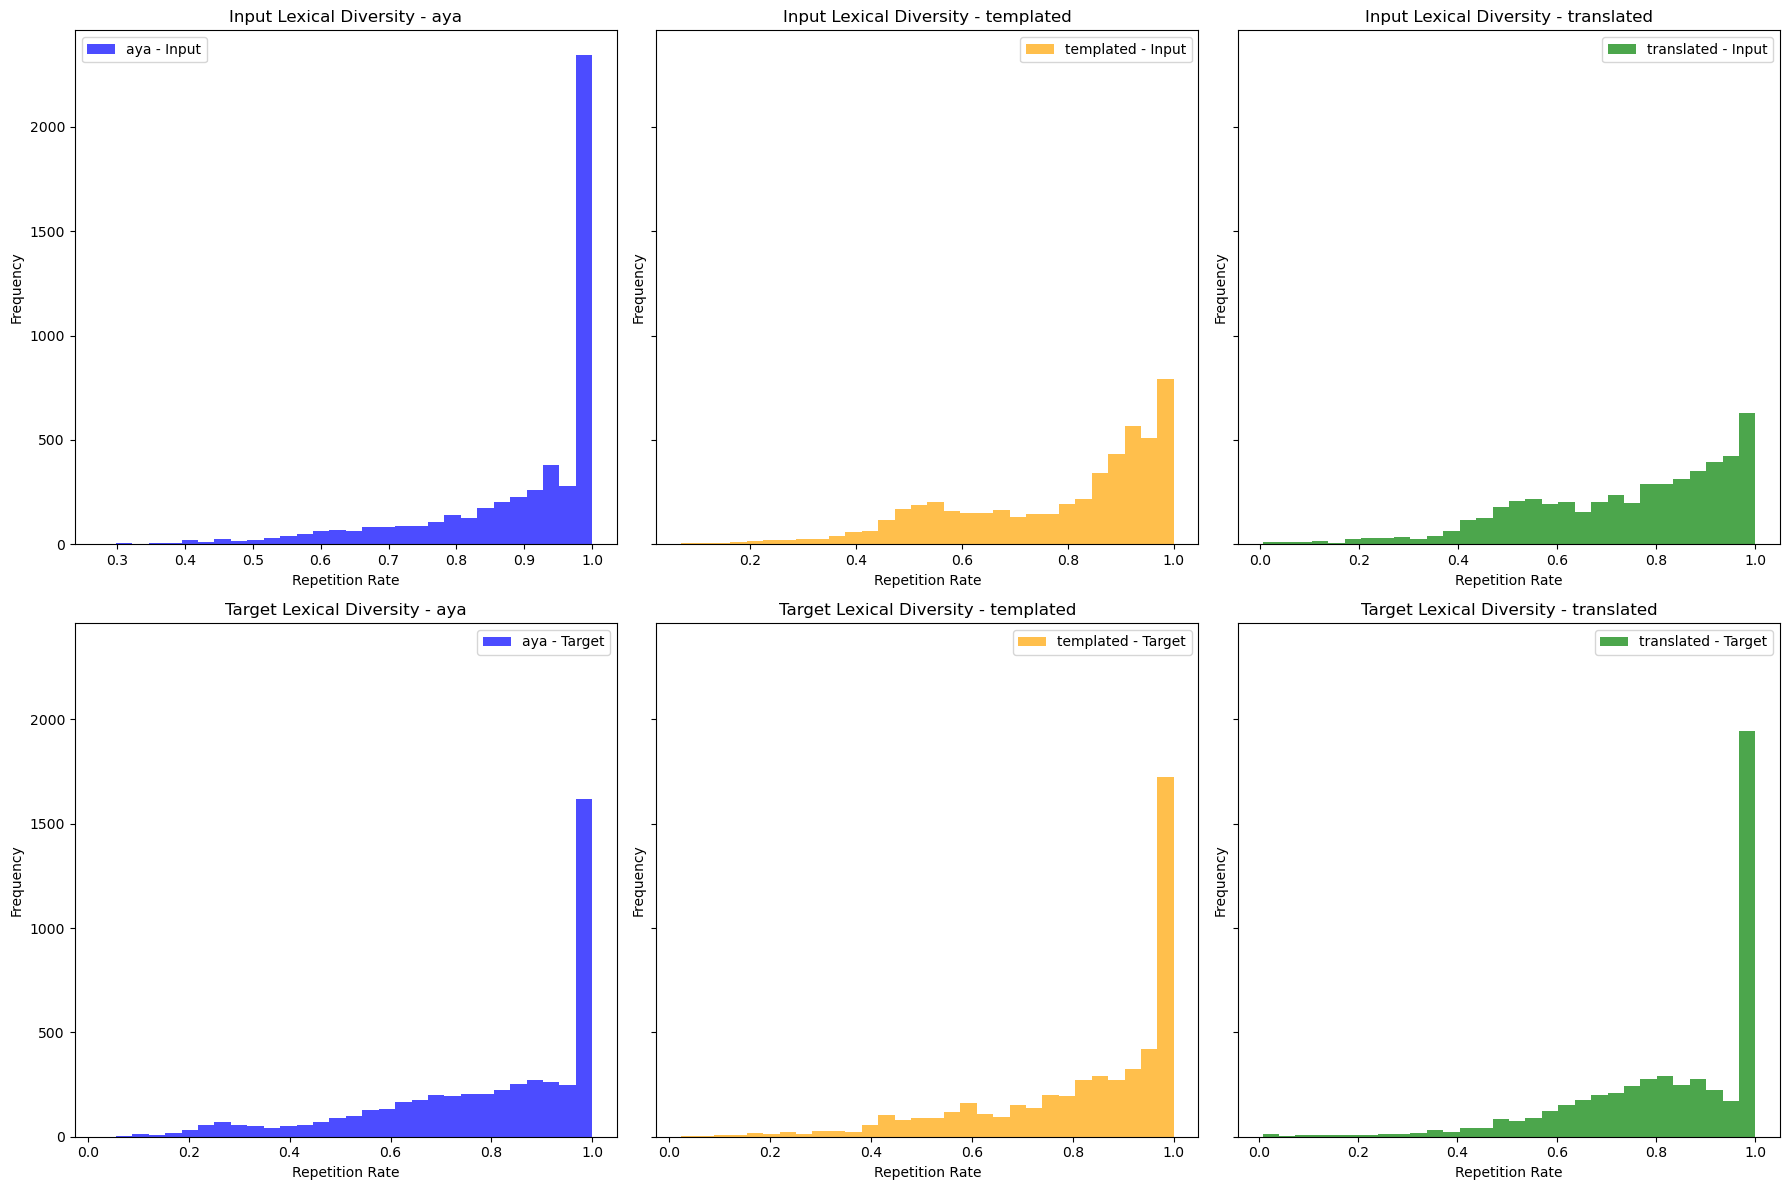

Plot saved as: lexical_diversity_histograms.png


In [15]:

# Prepare subplots with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharey=True)

# Define the partitions and the data
partitions = ['aya', 'templated', 'translated']
colors = ['blue', 'orange', 'green']

# Plot input token repetition rate histograms for each partition
for i, partition in enumerate(partitions):
    axes[0, i].hist(
        df[df['aya_partition'] == partition]['input_lexical_diversity'],
        bins=30, alpha=0.7, color=colors[i], label=f"{partition} - Input"
    )
    axes[0, i].set_title(f"Input Lexical Diversity - {partition}")
    axes[0, i].set_xlabel("Repetition Rate")
    axes[0, i].set_ylabel("Frequency")
    axes[0, i].legend()

# Plot target token repetition rate histograms for each partition
for i, partition in enumerate(partitions):
    axes[1, i].hist(
        df[df['aya_partition'] == partition]['target_lexical_diversity'],
        bins=30, alpha=0.7, color=colors[i], label=f"{partition} - Target"
    )
    axes[1, i].set_title(f"Target Lexical Diversity - {partition}")
    axes[1, i].set_xlabel("Repetition Rate")
    axes[1, i].set_ylabel("Frequency")
    axes[1, i].legend()

# Adjust layout for better display
plt.tight_layout()
plt.show()

# Save the plot as a PNG file
output_path = "lexical_diversity_histograms.png"

fig.savefig(output_path, format="png", dpi=300)
print(f"Plot saved as: {output_path}")



In [16]:
df

,id,inputs,targets,dataset_name,sub_dataset_name,task_type,template_id,language,split,script,subset_name,aya_partition,input_lexical_diversity,target_lexical_diversity
0,303,Quæ a l’é a traduçion italiaña de sto testo?\n...,A traduçion in italian do testo a l’é:\nSalari...,Lijnews-instruct,lijnews-instruct-lij-ita,translation,18,lij,train,Latn,templated_ligurian_news_train_sample,templated,0.590747,0.717277
1,212,Traduci questo testo in genovese:\nL'Europa ap...,La traduzione in genovese del testo è:\nL'Eurö...,Lijnews-instruct,lijnews-instruct-ita-lij,translation,6,ita,train,Latn,templated_ligurian_news_train_sample,templated,0.648649,0.548287
2,170,Qual è la traduzione genovese di questo testo?...,La traduzione in genovese del testo è:\nAttent...,Lijnews-instruct,lijnews-instruct-ita-lij,translation,8,ita,train,Latn,templated_ligurian_news_train_sample,templated,0.711934,0.554252
3,290,Traduxi in lengua italiaña:\nPapê fäsci in scî...,A traduçion in italian do testo a l’é:\nFalsi ...,Lijnews-instruct,lijnews-instruct-lij-ita,translation,14,lij,train,Latn,templated_ligurian_news_train_sample,templated,0.530055,0.671756
4,331,Quæ a l’é a traduçion italiaña de sto testo?\n...,A traduçion in italian do testo a l’é:\nRussia...,Lijnews-instruct,lijnews-instruct-lij-ita,translation,18,lij,train,Latn,templated_ligurian_news_train_sample,templated,0.497238,0.645299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15071,151002,Ba mhaith liom tuirse a thabhairt do ghaolta a...,Ba mhaith liom a mholadh dóibh pictiúr greannm...,Aya-Dataset,-,-,0,gle,train,Latn,aya_dataset_train_sample,aya,0.925926,0.777778
15072,158437,Ερώτηση: Τι είναι η απάντηση στην αξία της ανά...,Απάντηση: Η ανάγνωση βιβλίων έχει αξία στην εκ...,Aya-Dataset,-,-,0,ita,train,Latn,aya_dataset_train_sample,aya,1.000000,0.883721
15073,65556,Haddii aan haysto 5 moos oo aan 2 xabo siiyo q...,Waxaad haysataa 3 moos.,Aya-Dataset,-,-,0,som,train,Latn,aya_dataset_train_sample,aya,0.892857,1.000000
15074,122083,Quelle est la capitale du Canada?,La capitale du Canada est Ottawa dans la provi...,Aya-Dataset,-,-,0,fra,train,Latn,aya_dataset_train_sample,aya,1.000000,0.579545


In [17]:
df['target_lexical_diversity'].describe()

count    15076.000000
mean         0.817404
std          0.203901
min          0.007264
25%          0.699511
50%          0.877800
75%          1.000000
max          1.000000
Name: target_lexical_diversity, dtype: float64

In [97]:
import pandas as pd

def define_thresholds(df, col, low_percentile=0.10, high_percentile=0.90):
    """
    Define thresholds for a column based on percentiles.
    """
    return {
        'low': df[col].quantile(low_percentile),
        'high': df[col].quantile(high_percentile)
    }

def categorize_rate(rate, thresholds):
    """
    Categorize a repetition rate as low, medium, or high based on thresholds.
    """
    if rate < thresholds['low']:
        return 'low'
    elif rate > thresholds['high']:
        return 'high'
    else:
        return 'medium'

def categorize_column(df, col, thresholds):
    """
    Add a category column for repetition rates based on thresholds.
    """
    category_col = f"{col}_category"
    df[category_col] = df[col].apply(lambda x: categorize_rate(x, thresholds))
    return df, category_col

def sample_by_category(df, category_col, category, num_samples=3, random_state=42):
    """
    Sample a number of rows from a specific category.
    """
    if category in df[category_col].values:
        return df[df[category_col] == category].sample(num_samples, random_state=random_state)
    else:
        return pd.DataFrame()  # Return empty DataFrame if no examples in category

def display_samples_by_partition(df, partition_col, col, num_samples=3, low_percentile=0.25, high_percentile=0.90):
    """
    Display examples from each partition categorized by a specific column.
    """
    partitions = df[partition_col].unique()
    # translator = pipeline("translation", model="Helsinki-NLP/opus-mt-mul-en")

    for partition in partitions:
        print(f"\n*********** Partition: {partition.upper()} ===")
        partition_df = df[df[partition_col] == partition]
        
        # Define thresholds and categorize
        thresholds = define_thresholds(partition_df, col, low_percentile, high_percentile)
        partition_df, category_col = categorize_column(partition_df, col, thresholds)
        
        # Sample and display examples for each category
        for category in ['low']:
            samples = sample_by_category(partition_df, category_col, category, num_samples)
            if not samples.empty:
                print(f"\n--- {category.upper()} ({col}) ---")
                for idx, row in samples.iterrows():
                    print(f"\nExample {idx + 1} ({row[col]:.4f}), subset: {row['subset_name']} :")
                    print(f"Target: {row['targets']}")
                    print(f"Inputs: {row['inputs']}")

                    # translation = translator(row['targets'], max_length=512)[0]['translation_text']
                    print("-" * 40)
            else:
                print(f"No examples found in {category.upper()} category for {partition}.")

                
# Example usage
display_samples_by_partition(
    df=df,
    partition_col='aya_partition',
    col='target_lexical_diversity',
    num_samples=3,
    low_percentile=0.05,
    high_percentile=0.95
)



*********** Partition: TEMPLATED ===

--- LOW (target_lexical_diversity) ---

Example 3205 (0.1328), subset: templated_hindi_headline_train_sample :
करीब 30 लोग लगभग 20 मिनट तक रेत पर औंधे मुंह लेटे रहे। इनमें से कुछ ने उसी रंग के कपड़े पहन रखे थे, जो आयलान ने पहने हुए थे। हुआ और मैं भावुक हो गई। इसने मुझे बक्र परिवार के उन बच्चों की याद दिला दी, जो पिछले युद्ध में गाजा तट पर मारे गए थे। इस बीच भूमध्यसागर के दूसरी ओर कल रबात तट पर दर्जनों लोगों ने आयलान को श्रद्धांजलि दी। वे उसी प्रकार समुद्र तट पर लेटे, जिस तरह आयलान का शव मिला था।    
करीब 30 लोग लगभग 20 मिनट तक रेत पर औंधे मुंह लेटे रहे। इनमें से कुछ ने उसी रंग के कपड़े पहन रखे थे, जो आयलान ने पहने हुए थे। हुआ और मैं भावुक हो गई। इसने मुझे बक्र परिवार के उन बच्चों की याद दिला दी, जो पिछले युद्ध में गाजा तट पर मारे गए थे। इस बीच भूमध्यसागर के दूसरी ओर कल रबात तट पर दर्जनों लोगों ने आयलान को श्रद्धांजलि दी। वे उसी प्रकार समुद्र तट पर लेटे, जिस तरह आयलान का शव मिला था।    
करीब 30 लोग लगभग 20 मिनट तक रेत पर औंधे मुंह लेटे रहे। इनमें स

/tmp/ipykernel_90346/1756958690.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[category_col] = df[col].apply(lambda x: categorize_rate(x, thresholds))
/tmp/ipykernel_90346/1756958690.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[category_col] = df[col].apply(lambda x: categorize_rate(x, thresholds))
/tmp/ipykernel_90346/1756958690.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [26]:
import pandas as pd

# Define the desired order
desired_order = ['aya_dataset', 'templated_afriqa', 'templated_afrisenti', 'templated_amharic_qa', 'templated_armenian_instruct', 'templated_bengali_news', 'templated_dutch_imdb', 'templated_hindi_headline', 'templated_hindi_news', 'templated_indic_paraphrase', 'templated_indic_sentiment', 'templated_indo_stories', 'templated_japanese_instruct', 'templated_joke_explaination', 'templated_ligurian_news', 'templated_masakhanews', 'templated_mintaka', 'templated_ntx_llm', 'templated_nusax_senti', 'templated_persian_farstail', 'templated_persian_instruct', 'templated_scirepeval', 'templated_seed_instruct', 'templated_soda', 'templated_tamil_stories', 'templated_tamil_thirukkural', 'templated_telugu_food', 'templated_telugu_jokes', 'templated_telugu_news', 'templated_telugu_poems', 'templated_telugu_riddles', 'templated_thai_pos', 'templated_thai_scb', 'templated_thai_usembassy', 'templated_thai_wikitionary', 'templated_turku_paraphrase', 'templated_ukranian_gec', 'templated_uner_llm', 'templated_urdu_news_category', 'templated_urdu_news_gen', 'templated_urdu_news_headline', 'templated_wiki_split', 'templated_xcsqa', 'templated_xlel_wd', 'templated_xwikis', 'translated_adversarial_qa', 'translated_cnn_dailymail', 'translated_dolly', 'translated_flan_coqa', 'translated_flan_cot', 'translated_flan_gem_wiki', 'translated_flan_lambada', 'translated_flan_qa', 'translated_hotpotqa', 'translated_joke_explaination', 'translated_mintaka', 'translated_mlqa', 'translated_nqopen', 'translated_paws', 'translated_piqa', 'translated_soda', 'translated_wiki_split', 'translated_wikiqa', 'translated_xlel_wd']


# Step 1: Compute metrics for each subset
metrics = df.groupby("subset_name").agg(
    avg_target_token_repetition_rate=("target_lexical_diversity", "mean"),
    p50_target_token_repetition_rate=("target_lexical_diversity", "median"),
    p90_target_token_repetition_rate=("target_lexical_diversity", lambda x: x.quantile(0.9)),
    p99_target_token_repetition_rate=("target_lexical_diversity", lambda x: x.quantile(0.99)),
    p25_target_token_repetition_rate=("target_lexical_diversity", lambda x: x.quantile(0.25)),
    p10_target_token_repetition_rate=("target_lexical_diversity", lambda x: x.quantile(0.10)),
    p5_target_token_repetition_rate=("target_lexical_diversity", lambda x: x.quantile(0.05))

).reset_index()

# Step 2: Remove suffix from `subset_name` for ordering
# Remove everything including the second-to-last underscore
metrics["subset_base"] = metrics["subset_name"].apply(
    lambda x: "_".join(x.split("_")[:-2])
)

# Display the updated `subset_base` column for verification
metrics[["subset_name", "subset_base"]]
# Debugging: Check which entries in `subset_base` do not match `desired_order`
missing_in_order = set(metrics["subset_base"]) - set(desired_order)
missing_in_metrics = set(desired_order) - set(metrics["subset_base"])

print("Entries in `subset_base` not in `desired_order`:", missing_in_order)
print("Entries in `desired_order` not in `subset_base`:", missing_in_metrics)

# Step 3: Add a categorical column to enforce order
metrics["subset_order"] = pd.Categorical(metrics["subset_base"], categories=desired_order, ordered=True)

# Step 4: Sort the metrics dataframe based on the desired order
metrics_sorted = metrics.sort_values("subset_order").drop(columns=["subset_base", "subset_order"])

# Display the sorted metrics
metrics_sorted


Entries in `subset_base` not in `desired_order`: set()
Entries in `desired_order` not in `subset_base`: set()


,subset_name,avg_target_token_repetition_rate,p50_target_token_repetition_rate,p90_target_token_repetition_rate,p99_target_token_repetition_rate,p25_target_token_repetition_rate,p10_target_token_repetition_rate,p5_target_token_repetition_rate
0,aya_dataset_train_sample,0.793039,0.857143,1.000000,1.000000,0.661017,0.468273,0.310381
1,templated_afriqa_train_sample,0.979162,1.000000,1.000000,1.000000,1.000000,1.000000,0.823060
2,templated_afrisenti_train_sample,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,templated_amharic_qa_train_sample,0.907612,0.916667,1.000000,1.000000,0.866667,0.833333,0.818182
4,templated_armenian_instruct_train_sample,0.921609,0.933333,1.000000,1.000000,0.875000,0.844168,0.825320
...,...,...,...,...,...,...,...,...
59,translated_piqa_train_sample,0.856959,0.900000,1.000000,1.000000,0.800000,0.656493,0.512500
60,translated_soda_train_sample,0.767812,0.787556,0.901707,0.969100,0.722636,0.608333,0.535915
61,translated_wiki_split_train_sample,0.804030,0.840168,0.924858,0.967788,0.773340,0.653073,0.557571
62,translated_wikiqa_train_sample,0.972964,1.000000,1.000000,1.000000,1.000000,0.916667,0.881333


In [27]:
output_path = 'target_lexical_diversity.csv'
metrics_sorted.to_csv(output_path, index=False)

## N-Grams

In [37]:
!pip install nltk

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 79.4 MB/s eta 0:00:00


In [40]:
import nltk
nltk.download('punkt')  # Download the standard punkt tokenizer

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [51]:
!pip install spacy

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.1/29.1 MB 119.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 101.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 137.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 103.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 92.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sagemaker 2.233.0 requires numpy<2.0,>=1.9.0, but you have numpy 2.0.2 which is incompatible.


In [52]:
import spacy
from nltk.util import ngrams
from collections import Counter

# Load SpaCy multilingual model
nlp = spacy.blank("xx")  # 'xx' is the multilingual model

def get_repeated_ngrams(text, n):
    doc = nlp(text)
    tokens = [token.text for token in doc]  # Extract tokens
    ngrams_list = list(ngrams(tokens, n))
    ngram_counts = Counter(ngrams_list)
    
    repeated_ngrams = [
        (" ".join(ngram), count) for ngram, count in ngram_counts.items() if count > 1
    ]
    return repeated_ngrams

df["repeated_2grams"] = df["targets"].apply(lambda x: get_repeated_ngrams(x, 2))
df["repeated_3grams"] = df["targets"].apply(lambda x: get_repeated_ngrams(x, 3))
df["repeated_4grams"] = df["targets"].apply(lambda x: get_repeated_ngrams(x, 4))


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/ec2-user/anaconda3/env

In [53]:
df[['targets', 'repeated_2grams', 'repeated_3grams', 'repeated_4grams']].head()

,targets,repeated_2grams,repeated_3grams,repeated_4grams
0,A traduçion in italian do testo a l’é:\nSalari...,"[(Governo apre, 2), (a settembre, 2), (. La, 2)]",[],[]
1,La traduzione in genovese del testo è:\nL'Eurö...,"[(a revixon, 2), (revixon do, 2), (do Pnrr, 2)...","[(a revixon do, 2), (revixon do Pnrr, 2), (in ...","[(a revixon do Pnrr, 2), (in sciô saläio minim..."
2,La traduzione in genovese del testo è:\nAttent...,"[(doî svedeixi, 2), (a l'à, 2), (co -, 2), (- ...",[],[]
3,A traduçion in italian do testo a l’é:\nFalsi ...,"[(chiesto il, 2), (giudizio per, 2), (per 47, ...","[(giudizio per 47, 2)]",[]
4,A traduçion in italian do testo a l’é:\nRussia...,"[(Russia ,, 2), (un aereo, 2), (aereo della, 2...","[(aereo della Wagner, 2), ("" , ha, 2)]",[]


The output of df["max_2gram_ngram"][0] indicates that there is a tie for the maximum count among the 2-grams in that particular row. If multiple 2-grams occur with the same maximum count, the function is designed to return all the 2-grams with the same count. Here's why:

In [54]:
def get_max_ngram_and_count(ngram_list):
    if not ngram_list:
        return None, 0  # No repeated n-grams
    max_count = max(ngram_list, key=lambda x: x[1])[1]  # Get the max count
    max_ngrams = [ngram for ngram, count in ngram_list if count == max_count]  # Handle ties
    return max_ngrams, max_count

# Apply to the dataframe
df["max_2gram_ngram"], df["max_2gram_count"] = zip(*df["repeated_2grams"].apply(get_max_ngram_and_count))
df["max_3gram_ngram"], df["max_3gram_count"] = zip(*df["repeated_3grams"].apply(get_max_ngram_and_count))
df["max_4gram_ngram"], df["max_4gram_count"] = zip(*df["repeated_4grams"].apply(get_max_ngram_and_count))


In [60]:
df["max_2gram_ngram"][0]

['Governo apre', 'a settembre', '. La']

In [61]:
set(df["max_3gram_count"])

{0,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 22,
 23,
 24,
 25,
 26,
 28,
 29,
 30,
 31,
 34,
 36,
 37,
 44,
 49,
 53,
 55,
 62,
 69,
 166,
 190,
 253,
 422}

In [79]:
import pandas as pd

def order_by_subsets(df, subset_column, desired_order, output_path):
    """
    Orders a DataFrame by a processed version of the subset column based on the desired order.
    Removes everything including and after the second-to-last underscore from the subset column 
    to create a base name for ordering.

    Args:
    - df (pd.DataFrame): Input DataFrame.
    - subset_column (str): The column name containing the subset identifiers.
    - desired_order (list): The desired order of subsets.
    - output_path (str): Path to save the ordered DataFrame.

    Returns:
    - pd.DataFrame: Ordered DataFrame.
    """
    def extract_subset_base(name):
        """
        Removes everything including and after the second-to-last underscore.
        """
        parts = name.split("_")
        return "_".join(parts[:-2]) if len(parts) > 2 else name

    # Create a base column for ordering
    df["subset_base"] = df[subset_column].apply(extract_subset_base)
    
    # print(df["subset_base"])
    # Add a categorical column for ordering based on the desired order
    df["subset_order"] = pd.Categorical(df["subset_base"], categories=desired_order, ordered=True)

    # Sort the DataFrame by the subset order
    df_ordered = df.sort_values("subset_order").drop(columns=["subset_base", "subset_order"])

    # Save to the specified output path
    df_ordered.to_csv(output_path, index=False)

    print(f"Ordered DataFrame saved to {output_path}")
    return df_ordered




In [80]:
# Adding percentiles (p50, p90, p99) to the summary statistics
summary_stats_with_percentiles = df.groupby("subset_name").agg(
    avg_max_2gram_count=("max_2gram_count", "mean"),
    p50_max_2gram_count=("max_2gram_count", lambda x: x.quantile(0.5)),
    p90_max_2gram_count=("max_2gram_count", lambda x: x.quantile(0.9)),
    p99_max_2gram_count=("max_2gram_count", lambda x: x.quantile(0.99)),
    max_max_2gram_count=("max_2gram_count", "max"),
    repeated_2gram_percentage=("max_2gram_count", lambda x: (x > 1).mean() * 100),
    avg_max_3gram_count=("max_3gram_count", "mean"),
    p50_max_3gram_count=("max_3gram_count", lambda x: x.quantile(0.5)),
    p90_max_3gram_count=("max_3gram_count", lambda x: x.quantile(0.9)),
    p99_max_3gram_count=("max_3gram_count", lambda x: x.quantile(0.99)),
    max_max_3gram_count=("max_3gram_count", "max"),
    repeated_3gram_percentage=("max_3gram_count", lambda x: (x > 1).mean() * 100),
    avg_max_4gram_count=("max_4gram_count", "mean"),
    p50_max_4gram_count=("max_4gram_count", lambda x: x.quantile(0.5)),
    p90_max_4gram_count=("max_4gram_count", lambda x: x.quantile(0.9)),
    p99_max_4gram_count=("max_4gram_count", lambda x: x.quantile(0.99)),
    max_max_4gram_count=("max_4gram_count", "max"),
    repeated_4gram_percentage=("max_4gram_count", lambda x: (x > 1).mean() * 100),
).reset_index()


In [81]:
# Assuming `df` is your DataFrame and `subset_name` is the column with subset identifiers
output_path = "max_ngrams.csv"
summary_stats_with_percentiles_sorted = order_by_subsets(summary_stats_with_percentiles, "subset_name", desired_order, output_path)


Ordered DataFrame saved to max_ngrams.csv


In [82]:
summary_stats_with_percentiles_sorted

,subset_name,avg_max_2gram_count,p50_max_2gram_count,p90_max_2gram_count,p99_max_2gram_count,max_max_2gram_count,repeated_2gram_percentage,avg_max_3gram_count,p50_max_3gram_count,p90_max_3gram_count,p99_max_3gram_count,max_max_3gram_count,repeated_3gram_percentage,avg_max_4gram_count,p50_max_4gram_count,p90_max_4gram_count,p99_max_4gram_count,max_max_4gram_count,repeated_4gram_percentage
0,aya_dataset_train_sample,2.421600,0.0,6.0,19.00,1947,40.340000,1.042200,0.0,3.0,9.0,422,27.060000,0.527200,0.0,2.0,5.0,179,17.420000
1,templated_afriqa_train_sample,0.052174,0.0,0.0,2.00,2,2.608696,0.000000,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.0,0.0,0,0.000000
2,templated_afrisenti_train_sample,0.000000,0.0,0.0,0.00,0,0.000000,0.000000,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.0,0.0,0,0.000000
3,templated_amharic_qa_train_sample,0.000000,0.0,0.0,0.00,0,0.000000,0.000000,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.0,0.0,0,0.000000
4,templated_armenian_instruct_train_sample,0.104348,0.0,0.0,2.00,2,5.217391,0.017391,0.0,0.0,0.0,2,0.869565,0.000000,0.0,0.0,0.0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,translated_piqa_train_sample,0.454545,0.0,2.0,4.74,11,17.045455,0.265152,0.0,0.0,3.0,11,9.848485,0.166667,0.0,0.0,2.0,10,5.681818
60,translated_soda_train_sample,1.026515,0.0,2.0,6.48,20,41.287879,0.390152,0.0,2.0,3.0,19,14.393939,0.185606,0.0,0.0,3.0,18,4.924242
61,translated_wiki_split_train_sample,0.731061,0.0,2.0,4.00,6,32.196970,0.193182,0.0,0.0,2.0,6,8.712121,0.094697,0.0,0.0,2.0,5,4.166667
62,translated_wikiqa_train_sample,0.015152,0.0,0.0,0.00,2,0.757576,0.000000,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.0,0.0,0,0.000000


In [83]:
# Function to extract examples for the max n-gram counts
def get_max_ngram_examples(df, subset_col, ngram_col, count_col):
    examples = {}
    for subset in df[subset_col].unique():
        subset_df = df[df[subset_col] == subset]
        if not subset_df.empty:
            # Get the row with the maximum count for the n-gram
            max_row = subset_df.loc[subset_df[count_col].idxmax()]
            examples[subset] = (max_row[ngram_col], max_row[count_col])
    return examples

# Get examples for 2-grams, 3-grams, and 4-grams
max_2gram_examples = get_max_ngram_examples(df, "subset_name", "max_2gram_ngram", "max_2gram_count")
max_3gram_examples = get_max_ngram_examples(df, "subset_name", "max_3gram_ngram", "max_3gram_count")
max_4gram_examples = get_max_ngram_examples(df, "subset_name", "max_4gram_ngram", "max_4gram_count")

# Organize examples into a DataFrame for better readability
examples_df = pd.DataFrame({
    "subset_name": max_2gram_examples.keys(),
    "max_2gram": [f"{ngram} ({count})" for ngram, count in max_2gram_examples.values()],
    "max_3gram": [f"{ngram} ({count})" for ngram, count in max_3gram_examples.values()],
    "max_4gram": [f"{ngram} ({count})" for ngram, count in max_4gram_examples.values()],
})


# Optionally save to Excel for review
examples_df

,subset_name,max_2gram,max_3gram,max_4gram
0,templated_ligurian_news_train_sample,['- o'] (9),['da - o'] (4),"[""_ Persoña de l'Anno"", ""Persoña de l'Anno _""]..."
1,templated_bengali_news_train_sample,None (0),None (0),None (0)
2,templated_tamil_thirukkural_train_sample,"['எல்லாப் பொருளும்', 'உடையது அரண்'] (2)",None (0),None (0)
3,templated_seed_instruct_train_sample,"['« o', 'o pòsto', 'pòsto de'] (4)",['« o pòsto'] (4),['« o pòsto de'] (3)
4,templated_ukranian_gec_train_sample,['. \n'] (7),['. \n «'] (6),['» . \n «'] (3)
...,...,...,...,...
59,translated_mintaka_train_sample,"['< unk', 'unk >'] (7)",['< unk >'] (7),"['< unk > <', 'unk > < unk', '> < unk >'] (6)"
60,translated_soda_train_sample,['শোয়দনা শোয়দনা'] (20),['শোয়দনা শোয়দনা শোয়দনা'] (19),['শোয়দনা শোয়দনা শোয়দনা শোয়দনা'] (18)
61,translated_flan_cot_train_sample,['■ ■'] (254),['■ ■ ■'] (253),['■ ■ ■ ■'] (252)
62,translated_piqa_train_sample,"['< unk', 'unk >'] (11)",['< unk >'] (11),"['< unk > <', 'unk > < unk', '> < unk >'] (10)"


In [84]:
# Assuming `df` is your DataFrame and `subset_name` is the column with subset identifiers
output_path = "example_ngrams.csv"
examples_df_sorted = order_by_subsets(examples_df, "subset_name", desired_order, output_path)


Ordered DataFrame saved to example_ngrams.csv


In [99]:
# Save the DataFrame to CSV with utf-8 encoding
examples_df_sorted.to_csv(output_path, index=False, encoding="utf-8")


In [100]:
# Display rows with non-ASCII characters
non_ascii_rows = examples_df_sorted[examples_df_sorted.apply(lambda row: any(ord(c) > 127 for c in str(row)), axis=1)]
print(non_ascii_rows)


                                  subset_name  \
36   templated_armenian_instruct_train_sample   
27      templated_hindi_headline_train_sample   
7           templated_hindi_news_train_sample   
28    templated_indic_paraphrase_train_sample   
40     templated_indic_sentiment_train_sample   
6    templated_japanese_instruct_train_sample   
0        templated_ligurian_news_train_sample   
33    templated_persian_farstail_train_sample   
43    templated_persian_instruct_train_sample   
3        templated_seed_instruct_train_sample   
19       templated_tamil_stories_train_sample   
2    templated_tamil_thirukkural_train_sample   
38         templated_telugu_food_train_sample   
29        templated_telugu_jokes_train_sample   
10         templated_telugu_news_train_sample   
23        templated_telugu_poems_train_sample   
21    templated_turku_paraphrase_train_sample   
4         templated_ukranian_gec_train_sample   
26       templated_urdu_news_gen_train_sample   
30             templ

In [101]:
examples_df_sorted.head(n=50)

,subset_name,max_2gram,max_3gram,max_4gram
63,aya_dataset_train_sample,['ni Ipinle'] (1947),[') ni Ipinle'] (422),"[', eyokan ni Ipinle'] (179)"
22,templated_afriqa_train_sample,"[', du'] (2)",None (0),None (0)
12,templated_afrisenti_train_sample,None (0),None (0),None (0)
39,templated_amharic_qa_train_sample,None (0),None (0),None (0)
36,templated_armenian_instruct_train_sample,"[', որտեղ'] (2)","['է , որը'] (2)",None (0)
1,templated_bengali_news_train_sample,None (0),None (0),None (0)
24,templated_dutch_imdb_train_sample,None (0),None (0),None (0)
27,templated_hindi_headline_train_sample,['है .'] (695),['हिन्दू एकता मंच'] (166),['को बचाने के लिए'] (61)
7,templated_hindi_news_train_sample,['राजू सिंह'] (3),['Realme 3 Pro'] (2),['ताकत और कमजोरी को'] (2)
28,templated_indic_paraphrase_train_sample,['ਫ਼ਿਲਮਾਂ ਵਿੱਚ'] (2),['ਕਰੋੜ ਰੁਪਏ ਨਾਲ'] (2),None (0)


In [90]:
# Identify the sample with the max_2gram_count of 1947
max_2gram_sample = df[df["max_2gram_count"] == 1947]

# Display the result
max_2gram_sample


,id,inputs,targets,dataset_name,sub_dataset_name,task_type,template_id,language,split,script,...,repeated_4grams,max_2gram_ngram,max_2gram_count,max_3gram_ngram,max_3gram_count,max_4gram_ngram,max_4gram_count,subset_base,subset_order,unknown_char_count
14665,3975,Àjàkálẹ̀ àrùn COVID-19 ní ilẹ̀ Nàìjíríà,Ní ọjọ́ kẹtàdínlọ́gbọ̀n oṣù kejì ọdún 2020 ni ...,Aya-Dataset,-,-,0,yor,train,Latn,...,"[(Ní ọjọ́ kẹtàdínlọ́gbọ̀n oṣù, 7), (ọjọ́ kẹtàd...",[ni Ipinle],1947,[) ni Ipinle],422,"[, eyokan ni Ipinle]",179,aya_dataset,aya_dataset,0


In [93]:
list(max_2gram_sample["targets"])[0]

'Ní ọjọ́ kẹtàdínlọ́gbọ̀n oṣù kejì ọdún 2020 ni wọ́n kọ́kọ́ kéde láti fìdí ìṣẹ̀lẹ̀ àkọ́kọ́ nípa àjàkálẹ̀ àrùn COVID-19 múlẹ̀ ní ilẹ̀ Nàìjíríà, nígbà tí wọ́n ṣe àyẹ̀wò fún ọmọ orílẹ̀-dè Italy kan ni ìlú èkó tí àyẹ̀wò si fi hàn wípé ó ní àrùn y ní èyí tí SARS-tC oV-2 n fa.[2][3]Ní ọjọ́ kesan an oṣù kẹta ọdún 2020, ni wọ́n kéde ìṣẹ̀lẹ̀ ẹlẹ́ẹ̀kẹjì lórí àrùn COVID-9 ní Ewékorò, n Ipinle Ogun látipasẹ̀ ọmọ orílẹ̀ èdè Nàìjìríà kan tí ó ní ifarakanra pelu ara ilu Itali yí.\n\nNí́ ọjọ́ kejìdínlọ́gbọ́n oṣù kíní ọdún 2020, ni ìjọba àpapọ̀ ilẹ̀ Nàìjíríà mu dá gbogbo ọmọ theorílẹ̀ èdè Nàìjíríà lójú nípa ìmúrasílẹ̀ ìjọba láti mú kí àmójútó tí ó lágbára wà fún àwọn pápá ọkọ̀ òfurufú ńlá maraarun láti se ìdíwọ́ fún ìtànkálẹ̀ àrùn COVID-19. Ìjọba kéde àwọn pápá ọkọ̀ òfurufú bi ti Ẹnugu, Eko, Rivers, Kano àti ti olú ìlú Nàìjíríà ní Abuja.[5] Ilé iṣẹ́ tí ó nṣe ìṣàkóso dídènà àrùn ní ilẹ̀ Nàìjíríà (Nigeria Centre for Disease Control) tún ṣe ìkéde ní ọjọ́ kanna pé àwọn ti ṣe àgbéǹde ẹgbẹ́ tí yìo ma rí sí àr

In [89]:
import pandas as pd

def count_unknown_chars(text):
    """
    Count occurrences of specific unknown character patterns in the text.
    """
    patterns = ['< unk >', '< unk ', '<unk >', '■']
    count = sum(text.count(pattern) for pattern in patterns)
    print(count > 1)
    return count

# Step 1: Calculate unknown character counts for each sample
df['unknown_char_count'] = df['targets'].apply(count_unknown_chars)

# Step 2: Compute summary statistics for unknown character counts
unknown_char_stats = df.groupby('subset_name').agg(
    avg_unknown_count=('unknown_char_count', 'mean'),
    p50_unknown_count=('unknown_char_count', 'median'),
    p90_unknown_count=('unknown_char_count', lambda x: x.quantile(0.9)),
    p99_unknown_count=('unknown_char_count', lambda x: x.quantile(0.99)),
    max_unknown_count=('unknown_char_count', 'max'),
    percent_with_unknowns=('unknown_char_count', lambda x: (x > 0).mean() * 100)  # Percent of samples with unknowns
).reset_index()


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [87]:
unknown_char_stats

,subset_name,avg_unknown_count,p50_unknown_count,p90_unknown_count,p99_unknown_count,max_unknown_count,percent_with_unknowns
0,aya_dataset_train_sample,0.0,0.0,0.0,0.0,0,0.0
1,templated_afriqa_train_sample,0.0,0.0,0.0,0.0,0,0.0
2,templated_afrisenti_train_sample,0.0,0.0,0.0,0.0,0,0.0
3,templated_amharic_qa_train_sample,0.0,0.0,0.0,0.0,0,0.0
4,templated_armenian_instruct_train_sample,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...
59,translated_piqa_train_sample,0.0,0.0,0.0,0.0,0,0.0
60,translated_soda_train_sample,0.0,0.0,0.0,0.0,0,0.0
61,translated_wiki_split_train_sample,0.0,0.0,0.0,0.0,0,0.0
62,translated_wikiqa_train_sample,0.0,0.0,0.0,0.0,0,0.0


### Language Identification

In [34]:
from collections import Counter

def find_majority_prefixes(strings, max_prefix_length=10, majority_threshold=0.8):
    """
    Identify common prefixes that occur in the majority of the rows.

    Parameters:
    - strings: List of strings to analyze.
    - max_prefix_length: Maximum number of words to consider for a prefix.
    - majority_threshold: Fraction of rows a prefix must appear in to be considered common.

    Returns:
    - A list of common prefixes that occur in the majority of the rows.
    """
    if not strings:
        return []

    # Extract prefixes
    prefixes = []
    for string in strings:
        tokens = string.split()
        for i in range(1, max_prefix_length + 1):
            prefixes.append(" ".join(tokens[:i]))

    # Count prefix occurrences
    prefix_counts = Counter(prefixes)
    total_strings = len(strings)

    # Identify majority prefixes
    majority_prefixes = [
        prefix for prefix, count in prefix_counts.items()
        if count / total_strings >= majority_threshold
    ]

    return majority_prefixes

def calculate_majority_prefixes(df, partition="templated", max_prefix_length=5, majority_threshold=0.5):
    """
    Calculate majority prefixes for each language in each subset of a specific partition.

    Parameters:
    - df: The dataframe containing text samples.
    - partition: The partition to filter on (e.g., 'templated').
    - max_prefix_length: Maximum number of words to consider for a prefix.
    - majority_threshold: Fraction of rows a prefix must appear in to be considered common.

    Returns:
    - A dictionary mapping (subset, language) to lists of majority prefixes.
    """
    # Filter for the specified partition
    df_partition = df[df["aya_partition"] == partition]

    # Group by subset_name and language
    majority_prefixes = {}
    grouped = df_partition.groupby(["subset_name", "language"])

    for (subset, language), group in grouped:
        texts = group["targets"].dropna().tolist()
        prefixes = find_majority_prefixes(
            texts, max_prefix_length=max_prefix_length, majority_threshold=majority_threshold
        )
        majority_prefixes[(subset, language)] = prefixes

    return majority_prefixes

# Run the function
majority_prefixes = calculate_majority_prefixes(df, partition="templated", max_prefix_length=5, majority_threshold=0.5)

# Display results
for (subset, language), prefixes in majority_prefixes.items():
    print(f"Subset: {subset}, Language: {language}")
    print(f"Majority Prefixes: {prefixes}")
    print("-" * 40)


Subset: templated_afriqa_train_sample, Language: bem
Majority Prefixes: ['Hakainde Hichilema', '2011', '1903', 'icibemba', 'Kim Jong-un', 'Kenneth Kaunda', 'Ostrich', 'Akabengele kakalamba']
----------------------------------------
Subset: templated_afriqa_train_sample, Language: eng
Majority Prefixes: []
----------------------------------------
Subset: templated_afriqa_train_sample, Language: fon
Majority Prefixes: ['abɔxwísùn 1982', 'Belmopan', '1983', 'Ouémé']
----------------------------------------
Subset: templated_afriqa_train_sample, Language: fra
Majority Prefixes: []
----------------------------------------
Subset: templated_afriqa_train_sample, Language: hau
Majority Prefixes: ['Lisbon', 'Hiroshima da Nagasak', 'Yankari National Park', '1967']
----------------------------------------
Subset: templated_afriqa_train_sample, Language: ibo
Majority Prefixes: ['West Lake', '2004', '27', 'British', 'Chinedu Okoli', 'San Francisco', 'Guglielmo Marconi']
----------------------------

### Language Identification

In [25]:
import fasttext
from huggingface_hub import hf_hub_download

model_path = hf_hub_download(repo_id="facebook/fasttext-language-identification", filename="model.bin")
model = fasttext.load_model(model_path)
model.predict("Igbesẹ yii lo mu ki ileeṣẹ ọlọpaa gbe igbimọ kan dide, ti wọn si paṣẹ pe ki ọkunrin naa lọọ rọọkun nile titi ti wọn yoo fi par")


(('__label__yor_Latn',), array([1.00000906]))

In [29]:
import fasttext
from huggingface_hub import hf_hub_download
import pandas as pd

# Load the FastText language identification model
model_path = hf_hub_download(repo_id="facebook/fasttext-language-identification", filename="model.bin")
model = fasttext.load_model(model_path)

# Define a function to predict language for each text
def predict_language(text):
    # try:
    # Predict the language and confidence score
    cleaned_text = text.replace("\n", " ").strip()
    label, confidence = model.predict(cleaned_text, k=1)
    return label[0], confidence[0]
    # except Exception as e:
    #     return "Error", 0.0  # Handle any prediction errors gracefully

# Apply the function to the `targets` column
df["fasttext_language"], df["fasttext_confidence"] = zip(*df["targets"].apply(predict_language))



In [50]:
set(df["subset_name"])

{'aya_dataset_train_sample',
 'templated_afriqa_train_sample',
 'templated_afrisenti_train_sample',
 'templated_amharic_qa_train_sample',
 'templated_armenian_instruct_train_sample',
 'templated_bengali_news_train_sample',
 'templated_dutch_imdb_train_sample',
 'templated_hindi_headline_train_sample',
 'templated_hindi_news_train_sample',
 'templated_indic_paraphrase_train_sample',
 'templated_indic_sentiment_train_sample',
 'templated_indo_stories_train_sample',
 'templated_japanese_instruct_train_sample',
 'templated_joke_explaination_train_sample',
 'templated_ligurian_news_train_sample',
 'templated_masakhanews_train_sample',
 'templated_mintaka_train_sample',
 'templated_ntx_llm_train_sample',
 'templated_nusax_senti_train_sample',
 'templated_persian_farstail_train_sample',
 'templated_persian_instruct_train_sample',
 'templated_scirepeval_val_sample',
 'templated_seed_instruct_train_sample',
 'templated_soda_train_sample',
 'templated_tamil_stories_train_sample',
 'templated_tam

In [56]:
"""

"""
# df["targets"][0]
list(df[df["subset_name"]=="templated_seed_instruct_train_sample"]["targets"])[0]

"The Ligurian (Genoese) translation is:\nIn Giamaica, o maiezzo comme instituçion o l'é sostituio de spesso con unna riga de compagni, perché e dònne pövie no peuan fâ confiansa in sce di contributi finançiäi regolari inte un ambiente d'instabilitæ econòmica."

In [61]:
list(df[df["subset_name"]=="templated_seed_instruct_train_sample"]["inputs"])[0]

'Translate from English to Genoese:\nIn Jamaica, marriage as an institution is often substituted for a series of partners, as poor women cannot rely on regular financial contributions in a climate of economic instability.'

In [31]:
set(df[df["subset_name"]=="templated_seed_instruct_train_sample"]["language"])

{'eng', 'lij'}

In [57]:
list(df[df["subset_name"]=="templated_seed_instruct_train_sample"]["language"])[0]

'eng'

In [60]:
list(df[df["subset_name"]=="templated_seed_instruct_train_sample"]["inputs"])[2]

"Traduxi in ingleise:\nO sente defæti che l'idea de çentro exemplare a l'é uña de træ descoverte ciù importante de l'antropologia linguistica."

In [59]:
list(df[df["subset_name"]=="templated_seed_instruct_train_sample"]["targets"])[2]

"A traduçion in ingleise do testo a l’é:\nHe feels, in fact, that the exemplary center idea is one of linguistic anthropology's three most important findings."

In [58]:
list(df[df["subset_name"]=="templated_seed_instruct_train_sample"]["language"])[2]

'lij'

In [62]:
list(df[df["subset_name"]=="templated_seed_instruct_train_sample"]["inputs"])[4]

'Translate to Ligurian:\nThis could potentially benefit mothers who cannot produce breast milk but want their children to have breast milk rather than formula.'

In [81]:
list(df[df["subset_name"]=="templated_seed_instruct_train_sample"]["targets"])[4]

'The Ligurian (Genoese) translation is:\nSto fæto o porrieiva aggiuttâ, in potensa, e moæ che no peuan produe do læte materno ma che veuan che i seu figgi aggian do læte materno ciufito che o læte artifiçiale.'

In [76]:
translated_jokes = df[df["subset_name"]=="translated_joke_explaination_train_sample"]
translated_jokes_hi = translated_jokes[translated_jokes["language"] == "hin"]

In [77]:
translated_jokes_hi

,id,inputs,targets,dataset_name,sub_dataset_name,task_type,template_id,language,split,script,subset_name,aya_partition,input_token_repetition_rate,target_token_repetition_rate,fasttext_language,fasttext_confidence,fasttext_language_code,language_match
6930,13063,प्रश्न: हैम्बर्गर हमेशा क्यों हार जाता है? A: ...,स्पष्टीकरणः केचप टमाटर से बना एक मोटा तरल पदार...,Joke-explaination-inst (T),-,generation,1,hin,train,Deva,translated_joke_explaination_train_sample,translated,0.170732,0.336634,__label__hin_Deva,0.999407,hin,True


In [80]:
list(translated_jokes_hi["targets"])[0]

'स्पष्टीकरणः केचप टमाटर से बना एक मोटा तरल पदार्थ है; केचप टमाटर से बनाया जाता है। बहुत से लोग अपने हैम्बर्गर पर केचप डालते हैं। \'पहुंचने\' का अर्थ है अपने से आगे के व्यक्ति के समान स्थान पर पहुंचना। "केचप" "पकड़ना" जैसा लगता है और यदि आप पकड़ नहीं सकते हैं तो आप दौड़ नहीं जीत सकते हैं! बेवकूफ मजाक!'

In [31]:
import pandas as pd

# Step 1: Extract the language codes from the `fasttext_language` column
df['fasttext_language_code'] = df['fasttext_language'].str.replace("__label__", "").str.split("_").str[0]

# Step 2: Compare fasttext language with the expected language
df['language_match'] = df['language'] == df['fasttext_language_code']

# Step 3: Summarize results
summary = {
    "Total Samples": len(df),
    "Matched Languages": df['language_match'].sum(),
    "Mismatched Languages": (~df['language_match']).sum(),
    "Match Percentage": (df['language_match'].mean() * 100),
    "Average Confidence (Mismatch)": df.loc[~df['language_match'], 'fasttext_confidence'].mean()
}

summary

{'Total Samples': 15076,
 'Matched Languages': 12032,
 'Mismatched Languages': 3044,
 'Match Percentage': 79.80896789599363,
 'Average Confidence (Mismatch)': 0.7533083517623285}

In [36]:
# set(df['fasttext_language_code'])

In [34]:
# Step 1: Extract the language codes from the `fasttext_language` column
df['fasttext_language_code'] = df['fasttext_language'].str.replace("__label__", "").str.split("_").str[0]

# Step 2: Compare fasttext language with the expected language
df['language_match'] = df['language'] == df['fasttext_language_code']

# Step 3: Group by subsets and calculate mismatch percentage
subset_mismatch_summary = (
    df.groupby('subset_name')
    .agg(
        total_samples=('language_match', 'count'),
        mismatched_samples=('language_match', lambda x: (~x).sum()),
        mismatch_percentage=('language_match', lambda x: (~x).mean() * 100),
        average_confidence_mismatched=('fasttext_confidence', lambda x: x[~df['language_match']].mean())
    )
    .reset_index()
)


# Display the summary
print("Language Mismatch Summary:")
subset_mismatch_summary.head(50)


Language Mismatch Summary:


,subset_name,total_samples,mismatched_samples,mismatch_percentage,average_confidence_mismatched
0,aya_dataset_train_sample,5000,684,13.680000,0.711115
1,templated_afriqa_train_sample,115,75,65.217391,0.601376
2,templated_afrisenti_train_sample,115,115,100.000000,0.997977
3,templated_amharic_qa_train_sample,115,0,0.000000,NaN
4,templated_armenian_instruct_train_sample,115,0,0.000000,NaN
5,templated_bengali_news_train_sample,115,0,0.000000,NaN
6,templated_dutch_imdb_train_sample,115,0,0.000000,NaN
7,templated_hindi_headline_train_sample,115,0,0.000000,NaN
8,templated_hindi_news_train_sample,115,0,0.000000,NaN
9,templated_indic_paraphrase_train_sample,115,0,0.000000,NaN


In [ ]:
# Step 4: Save the enriched DataFrame and summary
df.to_csv("language_comparison_results.csv", index=False)

# Convert the summary to a DataFrame for saving
summary_df = pd.DataFrame([summary])
summary_df.to_excel("language_comparison_summary.xlsx", index=False)

# Print the summary
print("Language Comparison Summary:")
print(summary)

# Print a sample of mismatched rows for review
print("\nSample Mismatched Rows:")
print(df[~df['language_match']][['targets', 'language', 'fasttext_language_code', 'fasttext_confidence']].head())


In [ ]:
# Display the dataframe with new columns
print(df.head())

# Save the results to a CSV or Excel file for further analysis
df.to_csv("language_predictions.csv", index=False)
print("Language predictions saved to 'language_predictions.csv'.")
